In [1]:
"""
优化参数使用
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from research_strategies.num3_single_trend.single_trend_strategy import SingleTrendStrategy

2020-02-23 21:07:53.978595	开始加载历史数据
2020-02-23 21:08:02.871929	历史数据加载完成，数据量：166335
2020-02-23 21:08:02.962670	策略初始化完成
2020-02-23 21:08:02.962670	开始回放历史数据
2020-02-23 21:08:07.419223	历史数据回放结束
2020-02-23 21:08:07.419223	开始计算逐日盯市盈亏
2020-02-23 21:08:07.425031	逐日盯市盈亏计算完成
2020-02-23 21:08:07.425031	开始计算策略统计指标
2020-02-23 21:08:07.433051	------------------------------
2020-02-23 21:08:07.433051	首个交易日：	2018-03-06
2020-02-23 21:08:07.433051	最后交易日：	2019-12-31
2020-02-23 21:08:07.433051	总交易日：	447
2020-02-23 21:08:07.433051	盈利交易日：	219
2020-02-23 21:08:07.433051	亏损交易日：	223
2020-02-23 21:08:07.433051	起始资金：	1,000,000.00
2020-02-23 21:08:07.433525	结束资金：	1,004,742.92
2020-02-23 21:08:07.433525	总收益率：	0.47%
2020-02-23 21:08:07.433525	年化收益：	0.25%
2020-02-23 21:08:07.433525	最大回撤: 	-6,839.49
2020-02-23 21:08:07.433525	百分比最大回撤: -0.68%
2020-02-23 21:08:07.433525	最长回撤天数: 	128
2020-02-23 21:08:07.433525	总盈亏：	4,742.92
2020-02-23 21:08:07.433525	总手续费：	653.72
2020-02-23 21:08:07.433525	总滑点：	1,166.00
2020-02-23 21:08

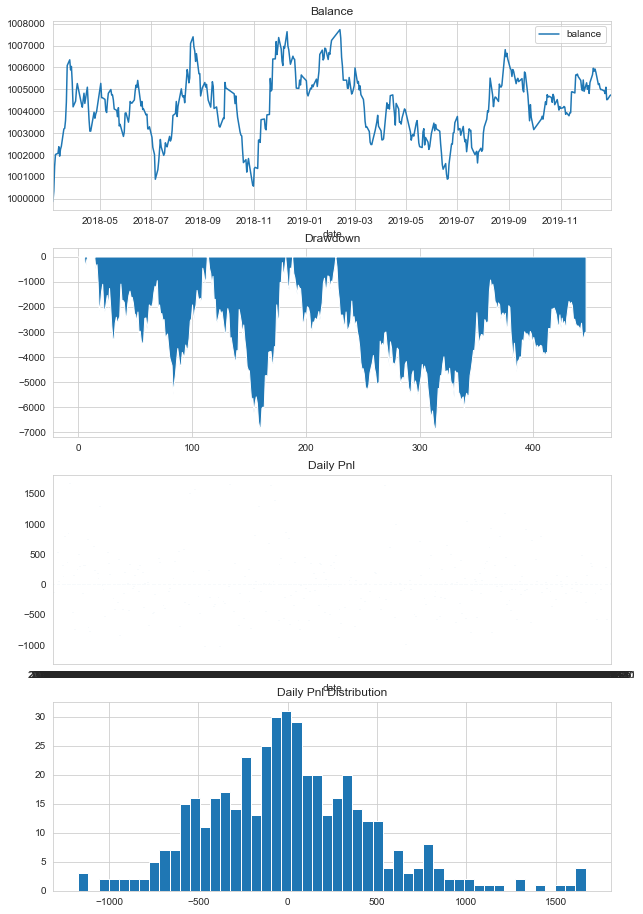

In [2]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="RB99.SHFE",
    interval="1m",
    start=datetime(2018, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,  # 保证金比例
    slippage=0.2,  # 滑点
    size=10,  # 合约乘数
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(SingleTrendStrategy, {
    'fixed_size': 50,
    'long_length': 30,
    'short_length': 8,
    'short_stop_rate': 2,
    'long_stop_rate': 4
})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [3]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("long_length", 10, 40, 5)
setting.add_parameter("short_length", 4, 16, 2)
setting.add_parameter("short_stop_rate", 1, 5, 1)
setting.add_parameter("long_stop_rate", 2, 12, 2)

engine.run_ga_optimization(setting)

2020-02-23 21:08:31.654900	参数优化空间：1470
2020-02-23 21:08:31.655953	每代族群总数：100
2020-02-23 21:08:31.655965	优良筛选个数：80
2020-02-23 21:08:31.655965	迭代次数：30
2020-02-23 21:08:31.655965	交叉概率：95%
2020-02-23 21:08:31.655965	突变概率：5%
2020-02-23 21:08:31.655965	开始加载历史数据
2020-02-23 21:08:31.662702	历史数据加载完成，数据量：166335
2020-02-23 21:08:31.837388	策略初始化完成
2020-02-23 21:08:31.837388	开始回放历史数据
2020-02-23 21:08:36.022215	历史数据回放结束
2020-02-23 21:08:36.023327	开始计算逐日盯市盈亏
2020-02-23 21:08:36.028197	逐日盯市盈亏计算完成
2020-02-23 21:08:36.028642	开始计算策略统计指标
2020-02-23 21:08:36.035189	开始加载历史数据
2020-02-23 21:08:36.039167	历史数据加载完成，数据量：166335
2020-02-23 21:08:36.193748	策略初始化完成
2020-02-23 21:08:36.193748	开始回放历史数据
2020-02-23 21:08:40.696761	历史数据回放结束
2020-02-23 21:08:40.697194	开始计算逐日盯市盈亏
2020-02-23 21:08:40.702139	逐日盯市盈亏计算完成
2020-02-23 21:08:40.702336	开始计算策略统计指标
2020-02-23 21:08:40.707566	开始加载历史数据
2020-02-23 21:08:40.710999	历史数据加载完成，数据量：166335
2020-02-23 21:08:40.812296	策略初始化完成
2020-02-23 21:08:40.812296	开始回放历史数据
2020-02-23 21:08:4

2020-02-23 21:10:35.115613	历史数据回放结束
2020-02-23 21:10:35.115613	开始计算逐日盯市盈亏
2020-02-23 21:10:35.125584	逐日盯市盈亏计算完成
2020-02-23 21:10:35.125584	开始计算策略统计指标
2020-02-23 21:10:35.131745	开始加载历史数据
2020-02-23 21:10:35.135556	历史数据加载完成，数据量：166335
2020-02-23 21:10:35.259254	策略初始化完成
2020-02-23 21:10:35.259254	开始回放历史数据
2020-02-23 21:10:39.666168	历史数据回放结束
2020-02-23 21:10:39.666168	开始计算逐日盯市盈亏
2020-02-23 21:10:39.671279	逐日盯市盈亏计算完成
2020-02-23 21:10:39.671279	开始计算策略统计指标
2020-02-23 21:10:39.677144	开始加载历史数据
2020-02-23 21:10:39.680136	历史数据加载完成，数据量：166335
2020-02-23 21:10:39.781840	策略初始化完成
2020-02-23 21:10:39.782878	开始回放历史数据
2020-02-23 21:10:44.498335	历史数据回放结束
2020-02-23 21:10:44.498335	开始计算逐日盯市盈亏
2020-02-23 21:10:44.504275	逐日盯市盈亏计算完成
2020-02-23 21:10:44.504275	开始计算策略统计指标
2020-02-23 21:10:44.510261	开始加载历史数据
2020-02-23 21:10:44.514250	历史数据加载完成，数据量：166335
2020-02-23 21:10:44.614008	策略初始化完成
2020-02-23 21:10:44.614008	开始回放历史数据
2020-02-23 21:10:49.041361	历史数据回放结束
2020-02-23 21:10:49.041361	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:12:37.845177	历史数据回放结束
2020-02-23 21:12:37.845177	开始计算逐日盯市盈亏
2020-02-23 21:12:37.850161	逐日盯市盈亏计算完成
2020-02-23 21:12:37.850161	开始计算策略统计指标
2020-02-23 21:12:37.856047	开始加载历史数据
2020-02-23 21:12:37.859717	历史数据加载完成，数据量：166335
2020-02-23 21:12:37.966768	策略初始化完成
2020-02-23 21:12:37.966969	开始回放历史数据
2020-02-23 21:12:42.443108	历史数据回放结束
2020-02-23 21:12:42.443108	开始计算逐日盯市盈亏
2020-02-23 21:12:42.448121	逐日盯市盈亏计算完成
2020-02-23 21:12:42.448350	开始计算策略统计指标
2020-02-23 21:12:42.454112	开始加载历史数据
2020-02-23 21:12:42.457099	历史数据加载完成，数据量：166335
2020-02-23 21:12:42.555834	策略初始化完成
2020-02-23 21:12:42.555834	开始回放历史数据
2020-02-23 21:12:46.915462	历史数据回放结束
2020-02-23 21:12:46.915462	开始计算逐日盯市盈亏
2020-02-23 21:12:46.920399	逐日盯市盈亏计算完成
2020-02-23 21:12:46.920399	开始计算策略统计指标
2020-02-23 21:12:46.926409	开始加载历史数据
2020-02-23 21:12:46.930399	历史数据加载完成，数据量：166335
2020-02-23 21:12:47.030139	策略初始化完成
2020-02-23 21:12:47.030139	开始回放历史数据
2020-02-23 21:12:51.684928	历史数据回放结束
2020-02-23 21:12:51.684928	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:14:41.460780	历史数据回放结束
2020-02-23 21:14:41.460780	开始计算逐日盯市盈亏
2020-02-23 21:14:41.465733	逐日盯市盈亏计算完成
2020-02-23 21:14:41.465733	开始计算策略统计指标
2020-02-23 21:14:41.472735	开始加载历史数据
2020-02-23 21:14:41.475733	历史数据加载完成，数据量：166335
2020-02-23 21:14:41.575486	策略初始化完成
2020-02-23 21:14:41.575486	开始回放历史数据
2020-02-23 21:14:45.981434	历史数据回放结束
2020-02-23 21:14:45.981434	开始计算逐日盯市盈亏
2020-02-23 21:14:45.987442	逐日盯市盈亏计算完成
2020-02-23 21:14:45.988303	开始计算策略统计指标
2020-02-23 21:14:45.993427	开始加载历史数据
2020-02-23 21:14:45.996422	历史数据加载完成，数据量：166335
2020-02-23 21:14:46.094990	策略初始化完成
2020-02-23 21:14:46.094990	开始回放历史数据
2020-02-23 21:14:50.248445	历史数据回放结束
2020-02-23 21:14:50.248445	开始计算逐日盯市盈亏
2020-02-23 21:14:50.254420	逐日盯市盈亏计算完成
2020-02-23 21:14:50.254420	开始计算策略统计指标
2020-02-23 21:14:50.260404	开始加载历史数据
2020-02-23 21:14:50.263428	历史数据加载完成，数据量：166335
2020-02-23 21:14:50.361168	策略初始化完成
2020-02-23 21:14:50.362163	开始回放历史数据
2020-02-23 21:14:54.782196	历史数据回放结束
2020-02-23 21:14:54.782196	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:16:40.557794	历史数据回放结束
2020-02-23 21:16:40.557794	开始计算逐日盯市盈亏
2020-02-23 21:16:40.562772	逐日盯市盈亏计算完成
2020-02-23 21:16:40.563446	开始计算策略统计指标
2020-02-23 21:16:40.568762	开始加载历史数据
2020-02-23 21:16:40.571754	历史数据加载完成，数据量：166335
2020-02-23 21:16:40.669462	策略初始化完成
2020-02-23 21:16:40.670110	开始回放历史数据
2020-02-23 21:16:44.872102	历史数据回放结束
2020-02-23 21:16:44.872102	开始计算逐日盯市盈亏
2020-02-23 21:16:44.877109	逐日盯市盈亏计算完成
2020-02-23 21:16:44.877109	开始计算策略统计指标
2020-02-23 21:16:44.884104	开始加载历史数据
2020-02-23 21:16:44.887061	历史数据加载完成，数据量：166335
2020-02-23 21:16:44.986794	策略初始化完成
2020-02-23 21:16:44.986794	开始回放历史数据
2020-02-23 21:16:49.404181	历史数据回放结束
2020-02-23 21:16:49.404181	开始计算逐日盯市盈亏
2020-02-23 21:16:49.410190	逐日盯市盈亏计算完成
2020-02-23 21:16:49.410190	开始计算策略统计指标
2020-02-23 21:16:49.416221	开始加载历史数据
2020-02-23 21:16:49.419170	历史数据加载完成，数据量：166335
2020-02-23 21:16:49.517907	策略初始化完成
2020-02-23 21:16:49.517907	开始回放历史数据
2020-02-23 21:16:53.691520	历史数据回放结束
2020-02-23 21:16:53.691860	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:18:39.568494	历史数据回放结束
2020-02-23 21:18:39.568494	开始计算逐日盯市盈亏
2020-02-23 21:18:39.573448	逐日盯市盈亏计算完成
2020-02-23 21:18:39.573448	开始计算策略统计指标
2020-02-23 21:18:39.580429	开始加载历史数据
2020-02-23 21:18:39.583449	历史数据加载完成，数据量：166335
2020-02-23 21:18:39.710108	策略初始化完成
2020-02-23 21:18:39.710108	开始回放历史数据
2020-02-23 21:18:44.133536	历史数据回放结束
2020-02-23 21:18:44.134483	开始计算逐日盯市盈亏
2020-02-23 21:18:44.139513	逐日盯市盈亏计算完成
2020-02-23 21:18:44.139513	开始计算策略统计指标
2020-02-23 21:18:44.145491	开始加载历史数据
2020-02-23 21:18:44.148487	历史数据加载完成，数据量：166335
2020-02-23 21:18:44.251198	策略初始化完成
2020-02-23 21:18:44.251538	开始回放历史数据
2020-02-23 21:18:48.404509	历史数据回放结束
2020-02-23 21:18:48.404509	开始计算逐日盯市盈亏
2020-02-23 21:18:48.409447	逐日盯市盈亏计算完成
2020-02-23 21:18:48.409447	开始计算策略统计指标
2020-02-23 21:18:48.416461	开始加载历史数据
2020-02-23 21:18:48.420418	历史数据加载完成，数据量：166335
2020-02-23 21:18:48.520066	策略初始化完成
2020-02-23 21:18:48.520066	开始回放历史数据
2020-02-23 21:18:52.972155	历史数据回放结束
2020-02-23 21:18:52.973152	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:20:39.025481	历史数据回放结束
2020-02-23 21:20:39.025481	开始计算逐日盯市盈亏
2020-02-23 21:20:39.030463	逐日盯市盈亏计算完成
2020-02-23 21:20:39.030463	开始计算策略统计指标
2020-02-23 21:20:39.036525	开始加载历史数据
2020-02-23 21:20:39.039444	历史数据加载完成，数据量：166335
2020-02-23 21:20:39.137180	策略初始化完成
2020-02-23 21:20:39.137180	开始回放历史数据
2020-02-23 21:20:43.572465	历史数据回放结束
2020-02-23 21:20:43.572465	开始计算逐日盯市盈亏
2020-02-23 21:20:43.577403	逐日盯市盈亏计算完成
2020-02-23 21:20:43.577403	开始计算策略统计指标
2020-02-23 21:20:43.584413	开始加载历史数据
2020-02-23 21:20:43.587405	历史数据加载完成，数据量：166335
2020-02-23 21:20:43.693122	策略初始化完成
2020-02-23 21:20:43.693122	开始回放历史数据
2020-02-23 21:20:47.837119	历史数据回放结束
2020-02-23 21:20:47.837119	开始计算逐日盯市盈亏
2020-02-23 21:20:47.842098	逐日盯市盈亏计算完成
2020-02-23 21:20:47.842098	开始计算策略统计指标
2020-02-23 21:20:47.848077	开始加载历史数据
2020-02-23 21:20:47.851077	历史数据加载完成，数据量：166335
2020-02-23 21:20:47.948817	策略初始化完成
2020-02-23 21:20:47.948817	开始回放历史数据
2020-02-23 21:20:52.112657	历史数据回放结束
2020-02-23 21:20:52.113309	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:22:38.013455	历史数据回放结束
2020-02-23 21:22:38.013455	开始计算逐日盯市盈亏
2020-02-23 21:22:38.018466	逐日盯市盈亏计算完成
2020-02-23 21:22:38.018466	开始计算策略统计指标
2020-02-23 21:22:38.024451	开始加载历史数据
2020-02-23 21:22:38.027449	历史数据加载完成，数据量：166335
2020-02-23 21:22:38.127181	策略初始化完成
2020-02-23 21:22:38.127181	开始回放历史数据
2020-02-23 21:22:42.536939	历史数据回放结束
2020-02-23 21:22:42.536939	开始计算逐日盯市盈亏
2020-02-23 21:22:42.541951	逐日盯市盈亏计算完成
2020-02-23 21:22:42.542076	开始计算策略统计指标
2020-02-23 21:22:42.547942	开始加载历史数据
2020-02-23 21:22:42.550918	历史数据加载完成，数据量：166335
2020-02-23 21:22:42.647671	策略初始化完成
2020-02-23 21:22:42.647671	开始回放历史数据
2020-02-23 21:22:46.851703	历史数据回放结束
2020-02-23 21:22:46.851703	开始计算逐日盯市盈亏
2020-02-23 21:22:46.856715	逐日盯市盈亏计算完成
2020-02-23 21:22:46.857109	开始计算策略统计指标
2020-02-23 21:22:46.862708	开始加载历史数据
2020-02-23 21:22:46.866663	历史数据加载完成，数据量：166335
2020-02-23 21:22:46.966423	策略初始化完成
2020-02-23 21:22:46.966423	开始回放历史数据
2020-02-23 21:22:51.142953	历史数据回放结束
2020-02-23 21:22:51.142953	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:24:37.535157	历史数据回放结束
2020-02-23 21:24:37.535157	开始计算逐日盯市盈亏
2020-02-23 21:24:37.540143	逐日盯市盈亏计算完成
2020-02-23 21:24:37.541151	开始计算策略统计指标
2020-02-23 21:24:37.547150	开始加载历史数据
2020-02-23 21:24:37.550151	历史数据加载完成，数据量：166335
2020-02-23 21:24:37.657873	策略初始化完成
2020-02-23 21:24:37.657873	开始回放历史数据
2020-02-23 21:24:41.819216	历史数据回放结束
2020-02-23 21:24:41.820245	开始计算逐日盯市盈亏
2020-02-23 21:24:41.825226	逐日盯市盈亏计算完成
2020-02-23 21:24:41.825226	开始计算策略统计指标
2020-02-23 21:24:41.831211	开始加载历史数据
2020-02-23 21:24:41.834200	历史数据加载完成，数据量：166335
2020-02-23 21:24:41.937925	策略初始化完成
2020-02-23 21:24:41.937925	开始回放历史数据
2020-02-23 21:24:46.364326	历史数据回放结束
2020-02-23 21:24:46.364326	开始计算逐日盯市盈亏
2020-02-23 21:24:46.369278	逐日盯市盈亏计算完成
2020-02-23 21:24:46.370325	开始计算策略统计指标
2020-02-23 21:24:46.375293	开始加载历史数据
2020-02-23 21:24:46.379277	历史数据加载完成，数据量：166335
2020-02-23 21:24:46.479030	策略初始化完成
2020-02-23 21:24:46.479030	开始回放历史数据
2020-02-23 21:24:50.662758	历史数据回放结束
2020-02-23 21:24:50.662758	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:26:36.608761	历史数据回放结束
2020-02-23 21:26:36.608761	开始计算逐日盯市盈亏
2020-02-23 21:26:36.614745	逐日盯市盈亏计算完成
2020-02-23 21:26:36.614745	开始计算策略统计指标
2020-02-23 21:26:36.620737	开始加载历史数据
2020-02-23 21:26:36.623733	历史数据加载完成，数据量：166335
2020-02-23 21:26:36.722430	策略初始化完成
2020-02-23 21:26:36.723651	开始回放历史数据
2020-02-23 21:26:40.907349	历史数据回放结束
2020-02-23 21:26:40.907349	开始计算逐日盯市盈亏
2020-02-23 21:26:40.912301	逐日盯市盈亏计算完成
2020-02-23 21:26:40.913311	开始计算策略统计指标
2  	100   	[0.35995856]	[0.]	[0.35995856]	[0.35995856]
2020-02-23 21:26:40.955333	开始加载历史数据
2020-02-23 21:26:40.958219	历史数据加载完成，数据量：166335
2020-02-23 21:26:41.057935	策略初始化完成
2020-02-23 21:26:41.057935	开始回放历史数据
2020-02-23 21:26:45.520288	历史数据回放结束
2020-02-23 21:26:45.520288	开始计算逐日盯市盈亏
2020-02-23 21:26:45.525273	逐日盯市盈亏计算完成
2020-02-23 21:26:45.526442	开始计算策略统计指标
2020-02-23 21:26:45.532286	开始加载历史数据
2020-02-23 21:26:45.535273	历史数据加载完成，数据量：166335
2020-02-23 21:26:45.634012	策略初始化完成
2020-02-23 21:26:45.635013	开始回放历史数据
2020-02-23 21:26:50.198086	历史数据回放

2020-02-23 21:28:36.141866	历史数据回放结束
2020-02-23 21:28:36.141866	开始计算逐日盯市盈亏
2020-02-23 21:28:36.147022	逐日盯市盈亏计算完成
2020-02-23 21:28:36.147851	开始计算策略统计指标
2020-02-23 21:28:36.153811	开始加载历史数据
2020-02-23 21:28:36.156800	历史数据加载完成，数据量：166335
2020-02-23 21:28:36.252545	策略初始化完成
2020-02-23 21:28:36.252545	开始回放历史数据
2020-02-23 21:28:40.646823	历史数据回放结束
2020-02-23 21:28:40.647808	开始计算逐日盯市盈亏
2020-02-23 21:28:40.651816	逐日盯市盈亏计算完成
2020-02-23 21:28:40.652878	开始计算策略统计指标
2020-02-23 21:28:40.657767	开始加载历史数据
2020-02-23 21:28:40.661755	历史数据加载完成，数据量：166335
2020-02-23 21:28:40.758528	策略初始化完成
2020-02-23 21:28:40.759526	开始回放历史数据
2020-02-23 21:28:44.934333	历史数据回放结束
2020-02-23 21:28:44.934333	开始计算逐日盯市盈亏
2020-02-23 21:28:44.940342	逐日盯市盈亏计算完成
2020-02-23 21:28:44.940565	开始计算策略统计指标
2020-02-23 21:28:44.946327	开始加载历史数据
2020-02-23 21:28:44.949292	历史数据加载完成，数据量：166335
2020-02-23 21:28:45.048076	策略初始化完成
2020-02-23 21:28:45.048076	开始回放历史数据
2020-02-23 21:28:49.461945	历史数据回放结束
2020-02-23 21:28:49.461945	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:35:12.499167	历史数据回放结束
2020-02-23 21:35:12.499167	开始计算逐日盯市盈亏
2020-02-23 21:35:12.504117	逐日盯市盈亏计算完成
2020-02-23 21:35:12.504117	开始计算策略统计指标
2020-02-23 21:35:12.510128	开始加载历史数据
2020-02-23 21:35:12.513126	历史数据加载完成，数据量：166335
2020-02-23 21:35:12.622338	策略初始化完成
2020-02-23 21:35:12.622338	开始回放历史数据
2020-02-23 21:35:16.874439	历史数据回放结束
2020-02-23 21:35:16.874439	开始计算逐日盯市盈亏
2020-02-23 21:35:16.879456	逐日盯市盈亏计算完成
2020-02-23 21:35:16.879456	开始计算策略统计指标
2020-02-23 21:35:16.885439	开始加载历史数据
2020-02-23 21:35:16.889398	历史数据加载完成，数据量：166335
2020-02-23 21:35:16.995159	策略初始化完成
2020-02-23 21:35:16.995159	开始回放历史数据
2020-02-23 21:35:21.522855	历史数据回放结束
2020-02-23 21:35:21.522855	开始计算逐日盯市盈亏
2020-02-23 21:35:21.527795	逐日盯市盈亏计算完成
2020-02-23 21:35:21.527795	开始计算策略统计指标
2020-02-23 21:35:21.533779	开始加载历史数据
2020-02-23 21:35:21.536772	历史数据加载完成，数据量：166335
2020-02-23 21:35:21.638302	策略初始化完成
2020-02-23 21:35:21.638302	开始回放历史数据
2020-02-23 21:35:25.934004	历史数据回放结束
2020-02-23 21:35:25.934541	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:37:19.547247	历史数据回放结束
2020-02-23 21:37:19.547247	开始计算逐日盯市盈亏
2020-02-23 21:37:19.552232	逐日盯市盈亏计算完成
2020-02-23 21:37:19.552232	开始计算策略统计指标
2020-02-23 21:37:19.559214	开始加载历史数据
2020-02-23 21:37:19.562204	历史数据加载完成，数据量：166335
2020-02-23 21:37:19.705820	策略初始化完成
2020-02-23 21:37:19.705820	开始回放历史数据
2020-02-23 21:37:24.095380	历史数据回放结束
2020-02-23 21:37:24.096378	开始计算逐日盯市盈亏
2020-02-23 21:37:24.101459	逐日盯市盈亏计算完成
2020-02-23 21:37:24.101459	开始计算策略统计指标
2020-02-23 21:37:24.107373	开始加载历史数据
2020-02-23 21:37:24.110583	历史数据加载完成，数据量：166335
2020-02-23 21:37:24.217652	策略初始化完成
2020-02-23 21:37:24.217652	开始回放历史数据
2020-02-23 21:37:28.573378	历史数据回放结束
2020-02-23 21:37:28.574375	开始计算逐日盯市盈亏
2020-02-23 21:37:28.579547	逐日盯市盈亏计算完成
2020-02-23 21:37:28.579547	开始计算策略统计指标
2020-02-23 21:37:28.585378	开始加载历史数据
2020-02-23 21:37:28.588366	历史数据加载完成，数据量：166335
2020-02-23 21:37:28.689091	策略初始化完成
2020-02-23 21:37:28.689091	开始回放历史数据
2020-02-23 21:37:33.399907	历史数据回放结束
2020-02-23 21:37:33.399907	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:39:21.984809	历史数据回放结束
2020-02-23 21:39:21.984809	开始计算逐日盯市盈亏
2020-02-23 21:39:21.989953	逐日盯市盈亏计算完成
2020-02-23 21:39:21.989953	开始计算策略统计指标
2020-02-23 21:39:21.995772	开始加载历史数据
2020-02-23 21:39:21.998765	历史数据加载完成，数据量：166335
2020-02-23 21:39:22.098487	策略初始化完成
2020-02-23 21:39:22.098487	开始回放历史数据
2020-02-23 21:39:26.332584	历史数据回放结束
2020-02-23 21:39:26.333251	开始计算逐日盯市盈亏
2020-02-23 21:39:26.337644	逐日盯市盈亏计算完成
2020-02-23 21:39:26.338600	开始计算策略统计指标
2020-02-23 21:39:26.344553	开始加载历史数据
2020-02-23 21:39:26.347543	历史数据加载完成，数据量：166335
2020-02-23 21:39:26.454257	策略初始化完成
2020-02-23 21:39:26.455255	开始回放历史数据
2020-02-23 21:39:30.687627	历史数据回放结束
2020-02-23 21:39:30.687627	开始计算逐日盯市盈亏
2020-02-23 21:39:30.693668	逐日盯市盈亏计算完成
2020-02-23 21:39:30.693668	开始计算策略统计指标
2020-02-23 21:39:30.699585	开始加载历史数据
2020-02-23 21:39:30.702538	历史数据加载完成，数据量：166335
2020-02-23 21:39:30.808107	策略初始化完成
2020-02-23 21:39:30.808107	开始回放历史数据
2020-02-23 21:39:35.511110	历史数据回放结束
2020-02-23 21:39:35.511110	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:41:25.255614	历史数据回放结束
2020-02-23 21:41:25.255614	开始计算逐日盯市盈亏
2020-02-23 21:41:25.260575	逐日盯市盈亏计算完成
2020-02-23 21:41:25.260575	开始计算策略统计指标
2020-02-23 21:41:25.267550	开始加载历史数据
2020-02-23 21:41:25.270547	历史数据加载完成，数据量：166335
2020-02-23 21:41:25.370284	策略初始化完成
2020-02-23 21:41:25.370284	开始回放历史数据
2020-02-23 21:41:29.577154	历史数据回放结束
2020-02-23 21:41:29.578100	开始计算逐日盯市盈亏
2020-02-23 21:41:29.582160	逐日盯市盈亏计算完成
2020-02-23 21:41:29.583120	开始计算策略统计指标
2020-02-23 21:41:29.589144	开始加载历史数据
2020-02-23 21:41:29.592116	历史数据加载完成，数据量：166335
2020-02-23 21:41:29.694820	策略初始化完成
2020-02-23 21:41:29.694820	开始回放历史数据
2020-02-23 21:41:34.165168	历史数据回放结束
2020-02-23 21:41:34.165793	开始计算逐日盯市盈亏
2020-02-23 21:41:34.170208	逐日盯市盈亏计算完成
2020-02-23 21:41:34.170208	开始计算策略统计指标
2020-02-23 21:41:34.176138	开始加载历史数据
2020-02-23 21:41:34.180173	历史数据加载完成，数据量：166335
2020-02-23 21:41:34.285890	策略初始化完成
2020-02-23 21:41:34.285929	开始回放历史数据
2020-02-23 21:41:38.800414	历史数据回放结束
2020-02-23 21:41:38.801268	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:43:29.155619	历史数据回放结束
2020-02-23 21:43:29.155619	开始计算逐日盯市盈亏
2020-02-23 21:43:29.160745	逐日盯市盈亏计算完成
2020-02-23 21:43:29.160745	开始计算策略统计指标
2020-02-23 21:43:29.166582	开始加载历史数据
2020-02-23 21:43:29.169573	历史数据加载完成，数据量：166335
2020-02-23 21:43:29.272258	策略初始化完成
2020-02-23 21:43:29.272258	开始回放历史数据
2020-02-23 21:43:33.573539	历史数据回放结束
2020-02-23 21:43:33.573713	开始计算逐日盯市盈亏
2020-02-23 21:43:33.578516	逐日盯市盈亏计算完成
2020-02-23 21:43:33.579088	开始计算策略统计指标
2020-02-23 21:43:33.584087	开始加载历史数据
2020-02-23 21:43:33.588030	历史数据加载完成，数据量：166335
2020-02-23 21:43:33.689803	策略初始化完成
2020-02-23 21:43:33.689803	开始回放历史数据
2020-02-23 21:43:38.169481	历史数据回放结束
2020-02-23 21:43:38.169481	开始计算逐日盯市盈亏
2020-02-23 21:43:38.174505	逐日盯市盈亏计算完成
2020-02-23 21:43:38.175514	开始计算策略统计指标
2020-02-23 21:43:38.180497	开始加载历史数据
2020-02-23 21:43:38.183485	历史数据加载完成，数据量：166335
2020-02-23 21:43:38.286215	策略初始化完成
2020-02-23 21:43:38.286215	开始回放历史数据
2020-02-23 21:43:42.556753	历史数据回放结束
2020-02-23 21:43:42.557284	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:45:30.516751	历史数据回放结束
2020-02-23 21:45:30.516751	开始计算逐日盯市盈亏
2020-02-23 21:45:30.522724	逐日盯市盈亏计算完成
2020-02-23 21:45:30.522724	开始计算策略统计指标
2020-02-23 21:45:30.528689	开始加载历史数据
2020-02-23 21:45:30.533680	历史数据加载完成，数据量：166335
2020-02-23 21:45:30.701393	策略初始化完成
2020-02-23 21:45:30.701393	开始回放历史数据
2020-02-23 21:45:35.202831	历史数据回放结束
2020-02-23 21:45:35.202831	开始计算逐日盯市盈亏
2020-02-23 21:45:35.208757	逐日盯市盈亏计算完成
2020-02-23 21:45:35.209802	开始计算策略统计指标
2020-02-23 21:45:35.215739	开始加载历史数据
2020-02-23 21:45:35.219809	历史数据加载完成，数据量：166335
2020-02-23 21:45:35.327440	策略初始化完成
2020-02-23 21:45:35.328438	开始回放历史数据
2020-02-23 21:45:39.673140	历史数据回放结束
2020-02-23 21:45:39.673140	开始计算逐日盯市盈亏
2020-02-23 21:45:39.678126	逐日盯市盈亏计算完成
2020-02-23 21:45:39.679144	开始计算策略统计指标
2020-02-23 21:45:39.685107	开始加载历史数据
2020-02-23 21:45:39.688100	历史数据加载完成，数据量：166335
2020-02-23 21:45:39.794845	策略初始化完成
2020-02-23 21:45:39.794845	开始回放历史数据
2020-02-23 21:45:44.120335	历史数据回放结束
2020-02-23 21:45:44.120335	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:48:03.333281	历史数据回放结束
2020-02-23 21:48:03.333281	开始计算逐日盯市盈亏
2020-02-23 21:48:03.339144	逐日盯市盈亏计算完成
2020-02-23 21:48:03.339144	开始计算策略统计指标
2020-02-23 21:48:03.346664	开始加载历史数据
2020-02-23 21:48:03.350132	历史数据加载完成，数据量：166335
2020-02-23 21:48:03.564496	策略初始化完成
2020-02-23 21:48:03.564496	开始回放历史数据
2020-02-23 21:48:10.071084	历史数据回放结束
2020-02-23 21:48:10.071084	开始计算逐日盯市盈亏
2020-02-23 21:48:10.075389	逐日盯市盈亏计算完成
2020-02-23 21:48:10.076173	开始计算策略统计指标
2020-02-23 21:48:10.082297	开始加载历史数据
2020-02-23 21:48:10.085522	历史数据加载完成，数据量：166335
2020-02-23 21:48:10.204515	策略初始化完成
2020-02-23 21:48:10.204515	开始回放历史数据
2020-02-23 21:48:16.070968	历史数据回放结束
2020-02-23 21:48:16.070968	开始计算逐日盯市盈亏
2020-02-23 21:48:16.076075	逐日盯市盈亏计算完成
2020-02-23 21:48:16.076075	开始计算策略统计指标
2020-02-23 21:48:16.083041	开始加载历史数据
2020-02-23 21:48:16.086082	历史数据加载完成，数据量：166335
2020-02-23 21:48:16.280908	策略初始化完成
2020-02-23 21:48:16.280908	开始回放历史数据
2020-02-23 21:48:22.130524	历史数据回放结束
2020-02-23 21:48:22.130524	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:50:26.140501	历史数据回放结束
2020-02-23 21:50:26.140501	开始计算逐日盯市盈亏
2020-02-23 21:50:26.145505	逐日盯市盈亏计算完成
2020-02-23 21:50:26.145505	开始计算策略统计指标
2020-02-23 21:50:26.151484	开始加载历史数据
2020-02-23 21:50:26.155474	历史数据加载完成，数据量：166335
2020-02-23 21:50:26.257296	策略初始化完成
2020-02-23 21:50:26.257296	开始回放历史数据
2020-02-23 21:50:31.245683	历史数据回放结束
2020-02-23 21:50:31.246780	开始计算逐日盯市盈亏
2020-02-23 21:50:31.256691	逐日盯市盈亏计算完成
2020-02-23 21:50:31.256691	开始计算策略统计指标
2020-02-23 21:50:31.264625	开始加载历史数据
2020-02-23 21:50:31.267714	历史数据加载完成，数据量：166335
2020-02-23 21:50:31.399305	策略初始化完成
2020-02-23 21:50:31.399305	开始回放历史数据
2020-02-23 21:50:36.348639	历史数据回放结束
2020-02-23 21:50:36.348639	开始计算逐日盯市盈亏
2020-02-23 21:50:36.353789	逐日盯市盈亏计算完成
2020-02-23 21:50:36.354609	开始计算策略统计指标
2020-02-23 21:50:36.359824	开始加载历史数据
2020-02-23 21:50:36.362827	历史数据加载完成，数据量：166335
2020-02-23 21:50:36.466251	策略初始化完成
2020-02-23 21:50:36.466251	开始回放历史数据
2020-02-23 21:50:41.433723	历史数据回放结束
2020-02-23 21:50:41.434671	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:52:48.418110	历史数据回放结束
2020-02-23 21:52:48.418110	开始计算逐日盯市盈亏
2020-02-23 21:52:48.423222	逐日盯市盈亏计算完成
2020-02-23 21:52:48.423222	开始计算策略统计指标
2020-02-23 21:52:48.430217	开始加载历史数据
2020-02-23 21:52:48.432720	历史数据加载完成，数据量：166335
2020-02-23 21:52:48.541471	策略初始化完成
2020-02-23 21:52:48.541471	开始回放历史数据
2020-02-23 21:52:53.559986	历史数据回放结束
2020-02-23 21:52:53.559986	开始计算逐日盯市盈亏
2020-02-23 21:52:53.564971	逐日盯市盈亏计算完成
2020-02-23 21:52:53.564971	开始计算策略统计指标
2020-02-23 21:52:53.571553	开始加载历史数据
2020-02-23 21:52:53.574545	历史数据加载完成，数据量：166335
2020-02-23 21:52:53.681100	策略初始化完成
2020-02-23 21:52:53.681100	开始回放历史数据
2020-02-23 21:52:58.185226	历史数据回放结束
2020-02-23 21:52:58.185583	开始计算逐日盯市盈亏
2020-02-23 21:52:58.190243	逐日盯市盈亏计算完成
2020-02-23 21:52:58.190927	开始计算策略统计指标
2020-02-23 21:52:58.196750	开始加载历史数据
2020-02-23 21:52:58.199217	历史数据加载完成，数据量：166335
2020-02-23 21:52:58.345083	策略初始化完成
2020-02-23 21:52:58.345083	开始回放历史数据
2020-02-23 21:53:03.267180	历史数据回放结束
2020-02-23 21:53:03.268172	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:55:22.208223	历史数据回放结束
2020-02-23 21:55:22.209288	开始计算逐日盯市盈亏
2020-02-23 21:55:22.214153	逐日盯市盈亏计算完成
2020-02-23 21:55:22.214153	开始计算策略统计指标
2020-02-23 21:55:22.220628	开始加载历史数据
2020-02-23 21:55:22.223579	历史数据加载完成，数据量：166335
2020-02-23 21:55:22.342471	策略初始化完成
2020-02-23 21:55:22.342471	开始回放历史数据
2020-02-23 21:55:28.004748	历史数据回放结束
2020-02-23 21:55:28.004748	开始计算逐日盯市盈亏
2020-02-23 21:55:28.010684	逐日盯市盈亏计算完成
2020-02-23 21:55:28.010684	开始计算策略统计指标
2020-02-23 21:55:28.016685	开始加载历史数据
2020-02-23 21:55:28.020741	历史数据加载完成，数据量：166335
2020-02-23 21:55:28.202833	策略初始化完成
2020-02-23 21:55:28.202833	开始回放历史数据
2020-02-23 21:55:33.690379	历史数据回放结束
2020-02-23 21:55:33.691473	开始计算逐日盯市盈亏
2020-02-23 21:55:33.698531	逐日盯市盈亏计算完成
2020-02-23 21:55:33.698531	开始计算策略统计指标
2020-02-23 21:55:33.705252	开始加载历史数据
2020-02-23 21:55:33.709398	历史数据加载完成，数据量：166335
2020-02-23 21:55:33.816549	策略初始化完成
2020-02-23 21:55:33.816549	开始回放历史数据
2020-02-23 21:55:39.078547	历史数据回放结束
2020-02-23 21:55:39.078547	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 21:58:02.777879	历史数据回放结束
2020-02-23 21:58:02.778554	开始计算逐日盯市盈亏
2020-02-23 21:58:02.783532	逐日盯市盈亏计算完成
2020-02-23 21:58:02.783532	开始计算策略统计指标
2020-02-23 21:58:02.789516	开始加载历史数据
2020-02-23 21:58:02.792077	历史数据加载完成，数据量：166335
2020-02-23 21:58:02.903349	策略初始化完成
2020-02-23 21:58:02.904498	开始回放历史数据
2020-02-23 21:58:09.107991	历史数据回放结束
2020-02-23 21:58:09.107991	开始计算逐日盯市盈亏
2020-02-23 21:58:09.112923	逐日盯市盈亏计算完成
2020-02-23 21:58:09.112923	开始计算策略统计指标
2020-02-23 21:58:09.119114	开始加载历史数据
2020-02-23 21:58:09.124134	历史数据加载完成，数据量：166335
2020-02-23 21:58:09.349555	策略初始化完成
2020-02-23 21:58:09.349555	开始回放历史数据
2020-02-23 21:58:14.842529	历史数据回放结束
2020-02-23 21:58:14.842529	开始计算逐日盯市盈亏
2020-02-23 21:58:14.847473	逐日盯市盈亏计算完成
2020-02-23 21:58:14.847473	开始计算策略统计指标
2020-02-23 21:58:14.853848	开始加载历史数据
2020-02-23 21:58:14.859001	历史数据加载完成，数据量：166335
2020-02-23 21:58:15.068893	策略初始化完成
2020-02-23 21:58:15.069787	开始回放历史数据
2020-02-23 21:58:20.976582	历史数据回放结束
2020-02-23 21:58:20.976582	开始计算逐日盯市盈亏
2020-02-23 21:

2020-02-23 22:00:24.631917	历史数据回放结束
2020-02-23 22:00:24.632909	开始计算逐日盯市盈亏
2020-02-23 22:00:24.637843	逐日盯市盈亏计算完成
2020-02-23 22:00:24.637843	开始计算策略统计指标
2020-02-23 22:00:24.643827	开始加载历史数据
2020-02-23 22:00:24.647816	历史数据加载完成，数据量：166335
2020-02-23 22:00:24.750491	策略初始化完成
2020-02-23 22:00:24.750491	开始回放历史数据
2020-02-23 22:00:29.753762	历史数据回放结束
2020-02-23 22:00:29.754499	开始计算逐日盯市盈亏
2020-02-23 22:00:29.758746	逐日盯市盈亏计算完成
2020-02-23 22:00:29.759744	开始计算策略统计指标
2020-02-23 22:00:29.765290	开始加载历史数据
2020-02-23 22:00:29.767771	历史数据加载完成，数据量：166335
2020-02-23 22:00:29.871165	策略初始化完成
2020-02-23 22:00:29.871165	开始回放历史数据
2020-02-23 22:00:34.464319	历史数据回放结束
2020-02-23 22:00:34.464319	开始计算逐日盯市盈亏
2020-02-23 22:00:34.469304	逐日盯市盈亏计算完成
2020-02-23 22:00:34.470402	开始计算策略统计指标
2020-02-23 22:00:34.476286	开始加载历史数据
2020-02-23 22:00:34.479277	历史数据加载完成，数据量：166335
2020-02-23 22:00:34.722452	策略初始化完成
2020-02-23 22:00:34.722452	开始回放历史数据
2020-02-23 22:00:39.781844	历史数据回放结束
2020-02-23 22:00:39.781844	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:02:39.167179	历史数据回放结束
2020-02-23 22:02:39.167179	开始计算逐日盯市盈亏
2020-02-23 22:02:39.172165	逐日盯市盈亏计算完成
2020-02-23 22:02:39.172752	开始计算策略统计指标
2020-02-23 22:02:39.178181	开始加载历史数据
2020-02-23 22:02:39.182168	历史数据加载完成，数据量：166335
2020-02-23 22:02:39.354302	策略初始化完成
2020-02-23 22:02:39.354302	开始回放历史数据
2020-02-23 22:02:43.957779	历史数据回放结束
2020-02-23 22:02:43.958777	开始计算逐日盯市盈亏
2020-02-23 22:02:43.963997	逐日盯市盈亏计算完成
2020-02-23 22:02:43.963997	开始计算策略统计指标
2020-02-23 22:02:43.970257	开始加载历史数据
2020-02-23 22:02:43.973249	历史数据加载完成，数据量：166335
2020-02-23 22:02:44.079963	策略初始化完成
2020-02-23 22:02:44.079963	开始回放历史数据
2020-02-23 22:02:49.004856	历史数据回放结束
2020-02-23 22:02:49.004856	开始计算逐日盯市盈亏
2020-02-23 22:02:49.009845	逐日盯市盈亏计算完成
2020-02-23 22:02:49.010669	开始计算策略统计指标
2020-02-23 22:02:49.015824	开始加载历史数据
2020-02-23 22:02:49.019813	历史数据加载完成，数据量：166335
2020-02-23 22:02:49.121541	策略初始化完成
2020-02-23 22:02:49.121541	开始回放历史数据
2020-02-23 22:02:53.876294	历史数据回放结束
2020-02-23 22:02:53.876294	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:05:08.501746	历史数据回放结束
2020-02-23 22:05:08.501746	开始计算逐日盯市盈亏
2020-02-23 22:05:08.506759	逐日盯市盈亏计算完成
2020-02-23 22:05:08.506759	开始计算策略统计指标
2020-02-23 22:05:08.512715	开始加载历史数据
2020-02-23 22:05:08.517838	历史数据加载完成，数据量：166335
2020-02-23 22:05:08.685425	策略初始化完成
2020-02-23 22:05:08.686467	开始回放历史数据
2020-02-23 22:05:14.338394	历史数据回放结束
2020-02-23 22:05:14.338394	开始计算逐日盯市盈亏
2020-02-23 22:05:14.344376	逐日盯市盈亏计算完成
2020-02-23 22:05:14.345341	开始计算策略统计指标
2020-02-23 22:05:14.353481	开始加载历史数据
2020-02-23 22:05:14.357594	历史数据加载完成，数据量：166335
2020-02-23 22:05:14.517502	策略初始化完成
2020-02-23 22:05:14.518814	开始回放历史数据
2020-02-23 22:05:20.023934	历史数据回放结束
2020-02-23 22:05:20.023934	开始计算逐日盯市盈亏
2020-02-23 22:05:20.028879	逐日盯市盈亏计算完成
2020-02-23 22:05:20.029729	开始计算策略统计指标
2020-02-23 22:05:20.035830	开始加载历史数据
2020-02-23 22:05:20.038833	历史数据加载完成，数据量：166335
2020-02-23 22:05:20.213594	策略初始化完成
2020-02-23 22:05:20.213594	开始回放历史数据
2020-02-23 22:05:25.273221	历史数据回放结束
2020-02-23 22:05:25.273221	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:07:33.901700	历史数据回放结束
2020-02-23 22:07:33.901700	开始计算逐日盯市盈亏
2020-02-23 22:07:33.908138	逐日盯市盈亏计算完成
2020-02-23 22:07:33.908138	开始计算策略统计指标
2020-02-23 22:07:33.914625	开始加载历史数据
2020-02-23 22:07:33.918614	历史数据加载完成，数据量：166335
2020-02-23 22:07:34.018347	策略初始化完成
2020-02-23 22:07:34.019344	开始回放历史数据
2020-02-23 22:07:38.512300	历史数据回放结束
2020-02-23 22:07:38.513298	开始计算逐日盯市盈亏
2020-02-23 22:07:38.518283	逐日盯市盈亏计算完成
2020-02-23 22:07:38.518283	开始计算策略统计指标
2020-02-23 22:07:38.524267	开始加载历史数据
2020-02-23 22:07:38.528256	历史数据加载完成，数据量：166335
2020-02-23 22:07:38.670901	策略初始化完成
2020-02-23 22:07:38.670901	开始回放历史数据
2020-02-23 22:07:43.305360	历史数据回放结束
2020-02-23 22:07:43.305360	开始计算逐日盯市盈亏
2020-02-23 22:07:43.310303	逐日盯市盈亏计算完成
2020-02-23 22:07:43.310303	开始计算策略统计指标
2020-02-23 22:07:43.317284	开始加载历史数据
2020-02-23 22:07:43.320276	历史数据加载完成，数据量：166335
2020-02-23 22:07:43.428498	策略初始化完成
2020-02-23 22:07:43.428498	开始回放历史数据
2020-02-23 22:07:47.948149	历史数据回放结束
2020-02-23 22:07:47.949488	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:09:43.831333	历史数据回放结束
2020-02-23 22:09:43.831333	开始计算逐日盯市盈亏
2020-02-23 22:09:43.837272	逐日盯市盈亏计算完成
2020-02-23 22:09:43.837738	开始计算策略统计指标
2020-02-23 22:09:43.843256	开始加载历史数据
2020-02-23 22:09:43.846248	历史数据加载完成，数据量：166335
2020-02-23 22:09:43.953992	策略初始化完成
2020-02-23 22:09:43.953992	开始回放历史数据
2020-02-23 22:09:48.657538	历史数据回放结束
2020-02-23 22:09:48.658190	开始计算逐日盯市盈亏
2020-02-23 22:09:48.662703	逐日盯市盈亏计算完成
2020-02-23 22:09:48.662703	开始计算策略统计指标
2020-02-23 22:09:48.668672	开始加载历史数据
2020-02-23 22:09:48.671498	历史数据加载完成，数据量：166335
2020-02-23 22:09:48.775220	策略初始化完成
2020-02-23 22:09:48.775220	开始回放历史数据
2020-02-23 22:09:53.161098	历史数据回放结束
2020-02-23 22:09:53.161098	开始计算逐日盯市盈亏
2020-02-23 22:09:53.165671	逐日盯市盈亏计算完成
2020-02-23 22:09:53.165671	开始计算策略统计指标
2020-02-23 22:09:53.171707	开始加载历史数据
2020-02-23 22:09:53.174646	历史数据加载完成，数据量：166335
2020-02-23 22:09:53.274379	策略初始化完成
2020-02-23 22:09:53.275486	开始回放历史数据
2020-02-23 22:09:57.929815	历史数据回放结束
2020-02-23 22:09:57.930156	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:11:49.608047	历史数据回放结束
2020-02-23 22:11:49.609044	开始计算逐日盯市盈亏
2020-02-23 22:11:49.613058	逐日盯市盈亏计算完成
2020-02-23 22:11:49.614030	开始计算策略统计指标
2020-02-23 22:11:49.620040	开始加载历史数据
2020-02-23 22:11:49.623036	历史数据加载完成，数据量：166335
2020-02-23 22:11:49.781582	策略初始化完成
2020-02-23 22:11:49.781582	开始回放历史数据
2020-02-23 22:11:54.134118	历史数据回放结束
2020-02-23 22:11:54.134118	开始计算逐日盯市盈亏
2020-02-23 22:11:54.139126	逐日盯市盈亏计算完成
2020-02-23 22:11:54.139126	开始计算策略统计指标
2020-02-23 22:11:54.145049	开始加载历史数据
2020-02-23 22:11:54.149039	历史数据加载完成，数据量：166335
2020-02-23 22:11:54.248773	策略初始化完成
2020-02-23 22:11:54.248773	开始回放历史数据
2020-02-23 22:11:58.671741	历史数据回放结束
2020-02-23 22:11:58.671741	开始计算逐日盯市盈亏
2020-02-23 22:11:58.676681	逐日盯市盈亏计算完成
2020-02-23 22:11:58.677798	开始计算策略统计指标
2020-02-23 22:11:58.683661	开始加载历史数据
2020-02-23 22:11:58.686653	历史数据加载完成，数据量：166335
2020-02-23 22:11:58.791399	策略初始化完成
2020-02-23 22:11:58.791399	开始回放历史数据
2020-02-23 22:12:03.492968	历史数据回放结束
2020-02-23 22:12:03.493960	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:13:54.907506	历史数据回放结束
2020-02-23 22:13:54.907506	开始计算逐日盯市盈亏
2020-02-23 22:13:54.912445	逐日盯市盈亏计算完成
2020-02-23 22:13:54.913052	开始计算策略统计指标
2020-02-23 22:13:54.918742	开始加载历史数据
2020-02-23 22:13:54.922418	历史数据加载完成，数据量：166335
2020-02-23 22:13:55.028135	策略初始化完成
2020-02-23 22:13:55.028135	开始回放历史数据
2020-02-23 22:13:59.694440	历史数据回放结束
2020-02-23 22:13:59.694440	开始计算逐日盯市盈亏
2020-02-23 22:13:59.699398	逐日盯市盈亏计算完成
2020-02-23 22:13:59.699398	开始计算策略统计指标
2020-02-23 22:13:59.705382	开始加载历史数据
2020-02-23 22:13:59.708457	历史数据加载完成，数据量：166335
2020-02-23 22:13:59.848001	策略初始化完成
2020-02-23 22:13:59.848999	开始回放历史数据
2020-02-23 22:14:04.314771	历史数据回放结束
2020-02-23 22:14:04.315768	开始计算逐日盯市盈亏
2020-02-23 22:14:04.320784	逐日盯市盈亏计算完成
2020-02-23 22:14:04.321252	开始计算策略统计指标
2020-02-23 22:14:04.326737	开始加载历史数据
2020-02-23 22:14:04.329728	历史数据加载完成，数据量：166335
2020-02-23 22:14:04.430460	策略初始化完成
2020-02-23 22:14:04.431458	开始回放历史数据
2020-02-23 22:14:08.788096	历史数据回放结束
2020-02-23 22:14:08.788853	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:16:00.638979	历史数据回放结束
2020-02-23 22:16:00.639976	开始计算逐日盯市盈亏
2020-02-23 22:16:00.644969	逐日盯市盈亏计算完成
2020-02-23 22:16:00.645156	开始计算策略统计指标
2020-02-23 22:16:00.649949	开始加载历史数据
2020-02-23 22:16:00.653938	历史数据加载完成，数据量：166335
2020-02-23 22:16:00.753672	策略初始化完成
2020-02-23 22:16:00.753672	开始回放历史数据
2020-02-23 22:16:05.324998	历史数据回放结束
2020-02-23 22:16:05.324998	开始计算逐日盯市盈亏
2020-02-23 22:16:05.330949	逐日盯市盈亏计算完成
2020-02-23 22:16:05.330949	开始计算策略统计指标
2020-02-23 22:16:05.336984	开始加载历史数据
2020-02-23 22:16:05.340303	历史数据加载完成，数据量：166335
2020-02-23 22:16:05.486580	策略初始化完成
2020-02-23 22:16:05.486580	开始回放历史数据
2020-02-23 22:16:10.141090	历史数据回放结束
2020-02-23 22:16:10.141654	开始计算逐日盯市盈亏
2020-02-23 22:16:10.146074	逐日盯市盈亏计算完成
2020-02-23 22:16:10.146074	开始计算策略统计指标
2020-02-23 22:16:10.152058	开始加载历史数据
2020-02-23 22:16:10.155050	历史数据加载完成，数据量：166335
2020-02-23 22:16:10.256058	策略初始化完成
2020-02-23 22:16:10.256058	开始回放历史数据
2020-02-23 22:16:14.598412	历史数据回放结束
2020-02-23 22:16:14.599361	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:18:06.252516	历史数据回放结束
2020-02-23 22:18:06.252516	开始计算逐日盯市盈亏
2020-02-23 22:18:06.257159	逐日盯市盈亏计算完成
2020-02-23 22:18:06.257159	开始计算策略统计指标
2020-02-23 22:18:06.264901	开始加载历史数据
2020-02-23 22:18:06.269002	历史数据加载完成，数据量：166335
2020-02-23 22:18:06.379342	策略初始化完成
2020-02-23 22:18:06.379342	开始回放历史数据
2020-02-23 22:18:11.428203	历史数据回放结束
2020-02-23 22:18:11.428203	开始计算逐日盯市盈亏
2020-02-23 22:18:11.434187	逐日盯市盈亏计算完成
2020-02-23 22:18:11.435364	开始计算策略统计指标
2020-02-23 22:18:11.442166	开始加载历史数据
2020-02-23 22:18:11.448149	历史数据加载完成，数据量：166335
2020-02-23 22:18:11.610351	策略初始化完成
2020-02-23 22:18:11.621327	开始回放历史数据
2020-02-23 22:18:16.993218	历史数据回放结束
2020-02-23 22:18:16.993341	开始计算逐日盯市盈亏
2020-02-23 22:18:16.998327	逐日盯市盈亏计算完成
2020-02-23 22:18:16.998327	开始计算策略统计指标
2020-02-23 22:18:17.004311	开始加载历史数据
2020-02-23 22:18:17.008300	历史数据加载完成，数据量：166335
2020-02-23 22:18:17.112656	策略初始化完成
2020-02-23 22:18:17.113653	开始回放历史数据
2020-02-23 22:18:22.383542	历史数据回放结束
2020-02-23 22:18:22.383542	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:20:33.233082	历史数据回放结束
2020-02-23 22:20:33.234077	开始计算逐日盯市盈亏
2020-02-23 22:20:33.238066	逐日盯市盈亏计算完成
2020-02-23 22:20:33.239064	开始计算策略统计指标
2020-02-23 22:20:33.244051	开始加载历史数据
2020-02-23 22:20:33.248040	历史数据加载完成，数据量：166335
2020-02-23 22:20:33.391703	策略初始化完成
2020-02-23 22:20:33.391703	开始回放历史数据
2020-02-23 22:20:38.499010	历史数据回放结束
2020-02-23 22:20:38.499010	开始计算逐日盯市盈亏
2020-02-23 22:20:38.508945	逐日盯市盈亏计算完成
2020-02-23 22:20:38.509956	开始计算策略统计指标
2020-02-23 22:20:38.522159	开始加载历史数据
2020-02-23 22:20:38.527405	历史数据加载完成，数据量：166335
2020-02-23 22:20:38.643389	策略初始化完成
2020-02-23 22:20:38.643389	开始回放历史数据
2020-02-23 22:20:43.309453	历史数据回放结束
2020-02-23 22:20:43.309453	开始计算逐日盯市盈亏
2020-02-23 22:20:43.314439	逐日盯市盈亏计算完成
2020-02-23 22:20:43.315237	开始计算策略统计指标
2020-02-23 22:20:43.320423	开始加载历史数据
2020-02-23 22:20:43.324412	历史数据加载完成，数据量：166335
2020-02-23 22:20:43.428134	策略初始化完成
2020-02-23 22:20:43.429132	开始回放历史数据
2020-02-23 22:20:48.093365	历史数据回放结束
2020-02-23 22:20:48.093580	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:22:46.734362	历史数据回放结束
2020-02-23 22:22:46.734362	开始计算逐日盯市盈亏
2020-02-23 22:22:46.740325	逐日盯市盈亏计算完成
2020-02-23 22:22:46.740325	开始计算策略统计指标
2020-02-23 22:22:46.746282	开始加载历史数据
2020-02-23 22:22:46.749499	历史数据加载完成，数据量：166335
2020-02-23 22:22:46.854005	策略初始化完成
2020-02-23 22:22:46.854991	开始回放历史数据
2020-02-23 22:22:51.566301	历史数据回放结束
2020-02-23 22:22:51.566301	开始计算逐日盯市盈亏
2020-02-23 22:22:51.571531	逐日盯市盈亏计算完成
2020-02-23 22:22:51.571531	开始计算策略统计指标
2020-02-23 22:22:51.577513	开始加载历史数据
2020-02-23 22:22:51.580505	历史数据加载完成，数据量：166335
2020-02-23 22:22:51.688217	策略初始化完成
2020-02-23 22:22:51.688217	开始回放历史数据
2020-02-23 22:22:56.243700	历史数据回放结束
2020-02-23 22:22:56.243700	开始计算逐日盯市盈亏
2020-02-23 22:22:56.249682	逐日盯市盈亏计算完成
2020-02-23 22:22:56.250367	开始计算策略统计指标
2020-02-23 22:22:56.256232	开始加载历史数据
2020-02-23 22:22:56.259965	历史数据加载完成，数据量：166335
2020-02-23 22:22:56.371225	策略初始化完成
2020-02-23 22:22:56.371225	开始回放历史数据
2020-02-23 22:23:01.265373	历史数据回放结束
2020-02-23 22:23:01.265373	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:24:59.674959	历史数据回放结束
2020-02-23 22:24:59.674959	开始计算逐日盯市盈亏
2020-02-23 22:24:59.680908	逐日盯市盈亏计算完成
2020-02-23 22:24:59.681120	开始计算策略统计指标
2020-02-23 22:24:59.686892	开始加载历史数据
2020-02-23 22:24:59.689884	历史数据加载完成，数据量：166335
2020-02-23 22:24:59.790614	策略初始化完成
2020-02-23 22:24:59.790614	开始回放历史数据
2020-02-23 22:25:04.175591	历史数据回放结束
2020-02-23 22:25:04.175591	开始计算逐日盯市盈亏
2020-02-23 22:25:04.180540	逐日盯市盈亏计算完成
2020-02-23 22:25:04.180540	开始计算策略统计指标
2020-02-23 22:25:04.187521	开始加载历史数据
2020-02-23 22:25:04.190513	历史数据加载完成，数据量：166335
2020-02-23 22:25:04.295263	策略初始化完成
2020-02-23 22:25:04.295263	开始回放历史数据
2020-02-23 22:25:08.636573	历史数据回放结束
2020-02-23 22:25:08.636573	开始计算逐日盯市盈亏
2020-02-23 22:25:08.642556	逐日盯市盈亏计算完成
2020-02-23 22:25:08.642556	开始计算策略统计指标
2020-02-23 22:25:08.648540	开始加载历史数据
2020-02-23 22:25:08.651724	历史数据加载完成，数据量：166335
2020-02-23 22:25:08.752262	策略初始化完成
2020-02-23 22:25:08.752262	开始回放历史数据
2020-02-23 22:25:13.497332	历史数据回放结束
2020-02-23 22:25:13.497332	开始计算逐日盯市盈亏
2020-02-23 22:

2020-02-23 22:27:09.440740	历史数据回放结束
2020-02-23 22:27:09.440740	开始计算逐日盯市盈亏
2020-02-23 22:27:09.455698	逐日盯市盈亏计算完成
2020-02-23 22:27:09.456528	开始计算策略统计指标
2020-02-23 22:27:09.475325	开始加载历史数据
2020-02-23 22:27:09.482274	历史数据加载完成，数据量：166335
2020-02-23 22:27:09.624926	策略初始化完成
2020-02-23 22:27:09.624926	开始回放历史数据
2020-02-23 22:27:14.259041	历史数据回放结束
2020-02-23 22:27:14.259041	开始计算逐日盯市盈亏
2020-02-23 22:27:14.264647	逐日盯市盈亏计算完成
2020-02-23 22:27:14.264647	开始计算策略统计指标
2020-02-23 22:27:14.273438	开始加载历史数据
2020-02-23 22:27:14.281078	历史数据加载完成，数据量：166335
2020-02-23 22:27:14.461635	策略初始化完成
2020-02-23 22:27:14.465889	开始回放历史数据
2020-02-23 22:27:19.525020	历史数据回放结束
2020-02-23 22:27:19.525020	开始计算逐日盯市盈亏
2020-02-23 22:27:19.529957	逐日盯市盈亏计算完成
2020-02-23 22:27:19.529957	开始计算策略统计指标
2020-02-23 22:27:19.536938	开始加载历史数据
2020-02-23 22:27:19.539930	历史数据加载完成，数据量：166335
2020-02-23 22:27:19.734410	策略初始化完成
2020-02-23 22:27:19.735408	开始回放历史数据
2020-02-23 22:27:24.454381	历史数据回放结束
2020-02-23 22:27:24.454381	开始计算逐日盯市盈亏
2020-02-23 22:

KeyboardInterrupt: 